# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [21]:
import datetime

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json
from scipy.stats import linregress

# Import API key
from config import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)


632

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
# Define the base url
url = "http://api.openweathermap.org/data/2.5/weather?"

# Add the api-key to our base url
url = url + "&appid=" + weather_api_key
# Adjust the units since we don't want to default into Kelvin
url = url + "&units=imperial"

In [4]:
# Create a count variable for the logging output
# Create a dictionary to temporarily hold the output from the API calls
count = 0
data_storage = {"City":[], "Lat":[],"Lng":[],"Max Temp":[],"Humidity":[],"Cloudiness":[],"Wind Speed":[],"Country":[],"Date":[]}

print('Beginning Data Retrieval')
print('-----------------------------')
for city in cities:
    try:
        query_url = url + "&q=" + city
        weather = requests.get(query_url).json()
        data_storage['Lat'].append(weather['coord']['lat'])
        data_storage['Lng'].append(weather['coord']['lon'])
        data_storage['Max Temp'].append(weather['main']['temp_max'])
        data_storage['Humidity'].append(weather['main']['humidity'])
        data_storage['Cloudiness'].append(weather['clouds']['all'])
        data_storage['Wind Speed'].append(weather['wind']['speed'])
        data_storage['Country'].append(weather['sys']['country'])
        data_storage['Date'].append(weather['dt'])
        data_storage['City'].append(city)
        
        count += 1
        print('Processing City Number ' + str(count) + ": " + city)
    except:
        print('City Not Found. Moving to next City.')
print('---------------------------')
print('Data Retrieval Complete')
print('---------------------------')

Beginning Data Retrieval
-----------------------------
Processing City Number 1: ribeira grande
Processing City Number 2: yanam
Processing City Number 3: vila
Processing City Number 4: upington
Processing City Number 5: butaritari
Processing City Number 6: chokurdakh
Processing City Number 7: jamestown
Processing City Number 8: busselton
Processing City Number 9: ushuaia
Processing City Number 10: asau
Processing City Number 11: sola
City Not Found. Moving to next City.
Processing City Number 12: kenai
Processing City Number 13: carupano
Processing City Number 14: bluff
Processing City Number 15: rikitea
Processing City Number 16: lavrentiya
Processing City Number 17: hilo
City Not Found. Moving to next City.
Processing City Number 18: port alfred
Processing City Number 19: isangel
Processing City Number 20: anadyr
Processing City Number 21: boa vista
Processing City Number 22: nikolskoye
Processing City Number 23: saint george
Processing City Number 24: vysokogornyy
Processing City Nu

Processing City Number 202: del rio
Processing City Number 203: mount gambier
Processing City Number 204: pimentel
Processing City Number 205: tallahassee
Processing City Number 206: norman wells
Processing City Number 207: kralendijk
Processing City Number 208: roma
Processing City Number 209: adrar
Processing City Number 210: noumea
Processing City Number 211: magistralnyy
Processing City Number 212: albany
Processing City Number 213: sistranda
Processing City Number 214: bubaque
Processing City Number 215: shimoda
Processing City Number 216: lucapa
Processing City Number 217: ajaccio
Processing City Number 218: salalah
Processing City Number 219: bambous virieux
Processing City Number 220: torbay
Processing City Number 221: nicoya
Processing City Number 222: esfarayen
City Not Found. Moving to next City.
Processing City Number 223: harper
Processing City Number 224: touros
City Not Found. Moving to next City.
Processing City Number 225: san patricio
Processing City Number 226: siyab

Processing City Number 404: vychegodskiy
City Not Found. Moving to next City.
Processing City Number 405: vila franca do campo
Processing City Number 406: collie
Processing City Number 407: chongqing
Processing City Number 408: granville
Processing City Number 409: kambove
Processing City Number 410: rock sound
Processing City Number 411: buerarema
Processing City Number 412: sitio novo do tocantins
Processing City Number 413: mogadishu
Processing City Number 414: lufilufi
Processing City Number 415: fort-shevchenko
Processing City Number 416: trairi
Processing City Number 417: nuuk
Processing City Number 418: soe
Processing City Number 419: kushima
Processing City Number 420: ilhabela
Processing City Number 421: karratha
Processing City Number 422: beringovskiy
Processing City Number 423: champerico
Processing City Number 424: hualmay
Processing City Number 425: tupik
Processing City Number 426: komsomolskiy
Processing City Number 427: cordoba
City Not Found. Moving to next City.
Proc

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [5]:
# Check to make sure that we collected the same number of datapoints into all of our keys
# Can't create a dataframe from the data if the columns are of unequal length
for key in data_storage:
    print(len(data_storage[key]))

581
581
581
581
581
581
581
581
581


In [6]:
# Initialize the dataframe from the dictionary we created earlier and visualize it
weather_df = pd.DataFrame(data_storage)
# Write our dataframe to a csv file in the current folder
weather_df.to_csv('Weather_Check.csv')
weather_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,ribeira grande,38.52,-28.70,62.98,60,100,3.67,PT,1603843729
1,yanam,16.73,82.22,73.89,74,64,3.67,IN,1603843771
2,vila,42.03,-8.16,54.00,95,100,5.99,PT,1603843727
3,upington,-28.45,21.26,75.20,16,0,8.05,ZA,1603843902
4,butaritari,3.07,172.79,80.98,66,98,4.43,KI,1603843902


In [7]:
weather_df.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,581.000000,581.000000,581.000000,581.000000,581.000000,581.000000,5.810000e+02
mean,20.225026,17.313236,57.536936,74.189329,52.122203,7.306661,1.603844e+09
std,33.642755,89.040637,21.307715,19.224229,39.093794,5.443012,9.977547e+01
min,-54.800000,-179.170000,-5.460000,8.000000,0.000000,0.070000,1.603843e+09
25%,-7.910000,-57.650000,42.800000,65.000000,5.000000,3.400000,1.603844e+09
50%,24.520000,21.550000,61.000000,78.000000,60.000000,5.820000,1.603844e+09
75%,49.220000,92.630000,75.990000,88.000000,90.000000,9.400000,1.603844e+09
max,78.220000,179.320000,89.600000,100.000000,100.000000,53.370000,1.603844e+09


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [11]:
# We inspect the data and see that in the humidity column the Max is 100. Therefore we won't have any cities to remove

In [9]:
#  Get the indices of cities that have humidity over 100%.


In [10]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

In [30]:
# Calculate the date from the Unix Timestamp provided
# Notice that all the dates are similar, ust timestamps from the same day
# So we will take the date and use it in our plot titles

month = datetime.date.fromtimestamp(data_storage['Date'][0]).month
day = datetime.date.fromtimestamp(data_storage['Date'][0]).day
year = datetime.date.fromtimestamp(data_storage['Date'][0]).year
date = "(" + str(month) + "/" + str(day) + "/" + str(year) + ")"

'(10/27/2020)'

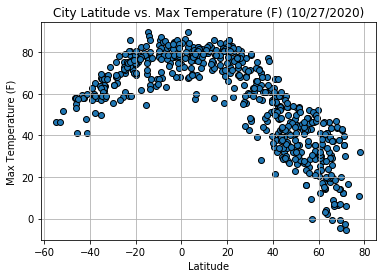

In [32]:
plt.scatter(weather_df['Lat'],weather_df['Max Temp'],edgecolors = 'black')
plt.grid()
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.title('City Latitude vs. Max Temperature (F) ' + date)
plt.show()

## Latitude vs. Humidity Plot

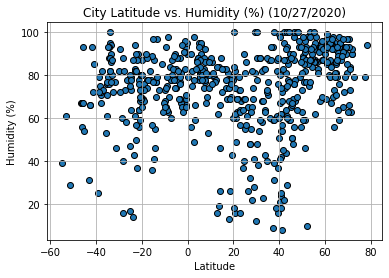

In [33]:
plt.scatter(weather_df['Lat'],weather_df['Humidity'],edgecolors = 'black')
plt.grid()
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title('City Latitude vs. Humidity (%) ' + date)
plt.show()

## Latitude vs. Cloudiness Plot

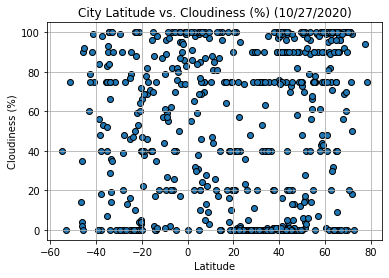

In [34]:
plt.scatter(weather_df['Lat'],weather_df['Cloudiness'],edgecolors = 'black')
plt.grid()
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title('City Latitude vs. Cloudiness (%) ' + date)
plt.show()

## Latitude vs. Wind Speed Plot

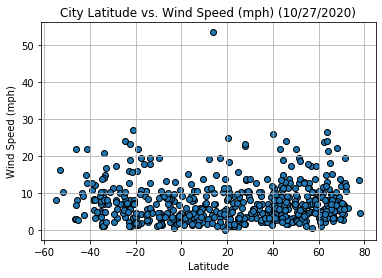

In [35]:
plt.scatter(weather_df['Lat'],weather_df['Wind Speed'],edgecolors = 'black')
plt.grid()
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title('City Latitude vs. Wind Speed (mph) ' + date)
plt.show()

## Linear Regression

In [38]:
north_df = weather_df.loc[weather_df['Lat'] >= 0,:]
south_df = weather_df.loc[weather_df['Lat'] < 0,:]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

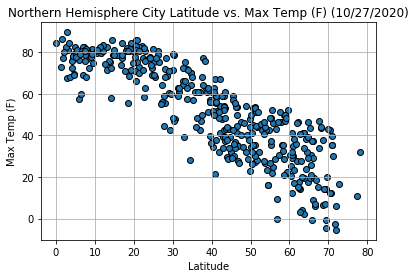

In [41]:
plt.scatter(north_df['Lat'],north_df['Max Temp'],edgecolors = 'black')
plt.grid()
plt.xlabel('Latitude')
plt.ylabel('Max Temp (F)')
plt.title('Northern Hemisphere City Latitude vs. Max Temp (F) ' + date)
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression